## Prepare a classification model using Naive Bayes for salary data

In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\abhil\Downloads\SalaryData_Train (1).csv')
df_test = pd.read_csv(r"C:\Users\abhil\Downloads\SalaryData_Test.csv")

## EDA

In [3]:
df.head()
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df.shape

(30161, 14)

In [5]:
df_test.shape

(15060, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
df_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

## Correlation, skewness and kurtosis

In [10]:
df.corr()

C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\3160324439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<AxesSubplot: >

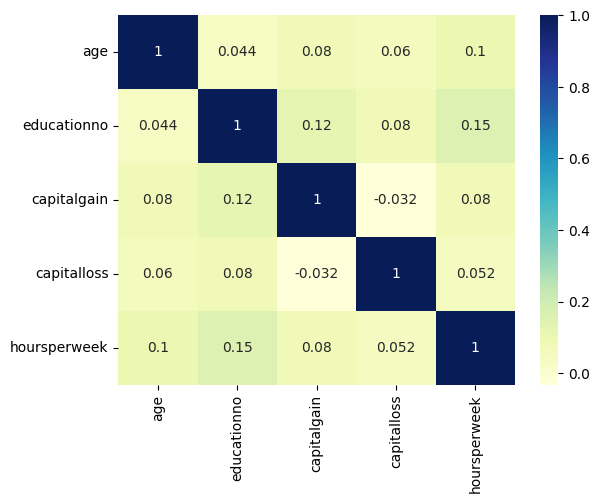

In [11]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [12]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

#### There is no correlation between the Numeric Data

In [13]:
df.skew()

C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age              0.530180
educationno     -0.305378
capitalgain     11.902483
capitalloss      4.528238
hoursperweek     0.330856
dtype: float64

#### age, capitalgain, capitalloss, hoursperweek are positively skewed
#### educationno is Negatively skewed

In [14]:
df.kurtosis()

C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\615572439.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


age              -0.144760
educationno       0.643605
capitalgain     153.661174
capitalloss      19.529284
hoursperweek      3.167683
dtype: float64

#### educationno, capitalgain, capitalloss, hoursperweek are positively skewed
#### age is Negatively skewed

In [15]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [16]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [17]:
df[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [18]:
for var in categorical: 
    
    print(df[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [19]:
# view frequency distribution of categorical variables
for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\1817410860.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\1817410860.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
C:\Users\abhil\App

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

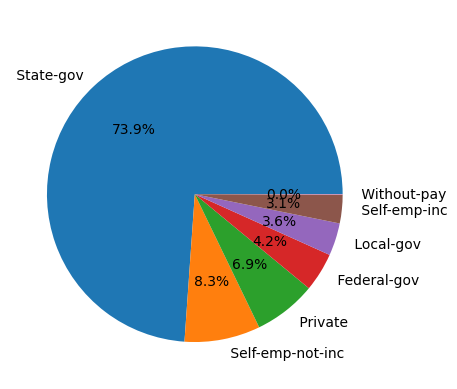

In [20]:
labels = df.workclass.unique()
plt.pie(df.workclass.value_counts(), autopct='%1.1f%%', labels = labels)
df.workclass.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

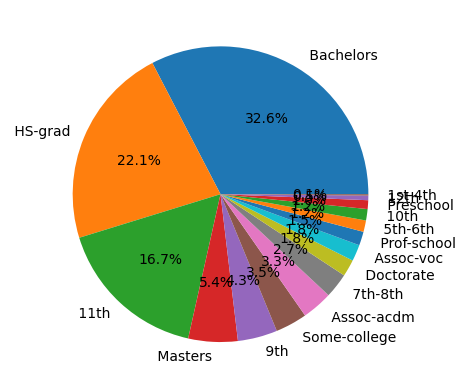

In [21]:
labels = df.education.unique()
plt.pie(df.education.value_counts(), autopct='%1.1f%%', labels = labels)
df.education.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

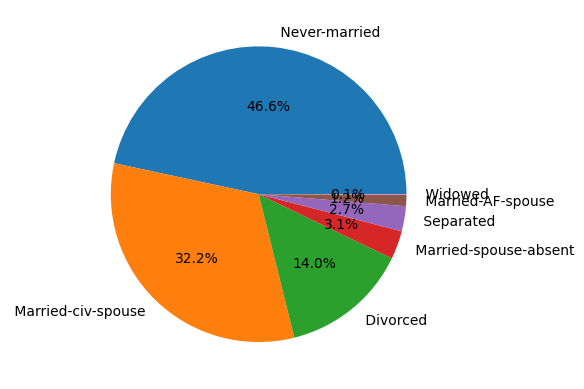

In [22]:
labels = df.maritalstatus.unique()
plt.pie(df.maritalstatus.value_counts(), autopct='%1.1f%%', labels = labels)
df.maritalstatus.value_counts()

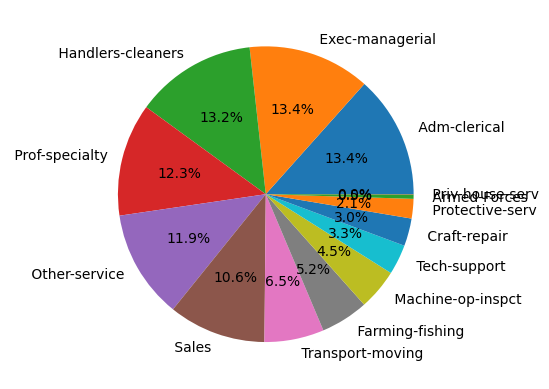

<Figure size 640x480 with 0 Axes>

In [23]:
labels = df.occupation.unique()
plt.pie(df.occupation.value_counts(), autopct='%1.1f%%', labels = labels)
df.occupation.value_counts()
plt.show()
plt.tight_layout()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

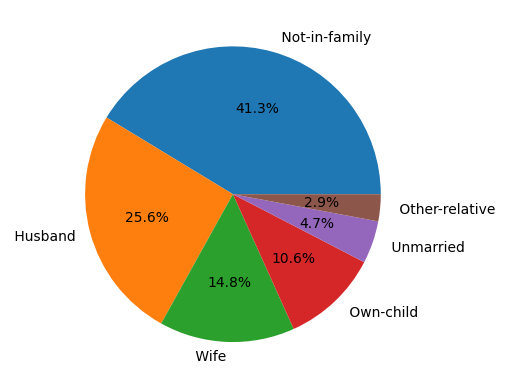

In [24]:
labels = df.relationship.unique()
plt.pie(df.relationship.value_counts(), autopct='%1.1f%%', labels = labels)
df.relationship.value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

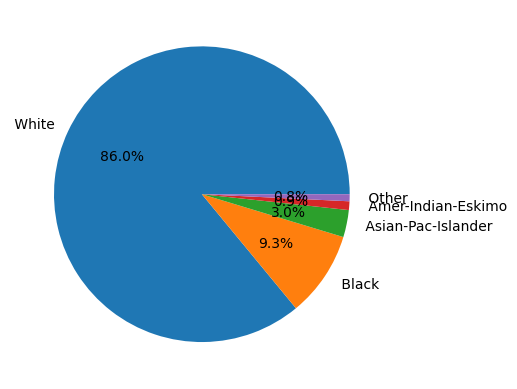

In [25]:
labels = df.race.unique()
plt.pie(df.race.value_counts(), autopct='%1.1f%%', labels = labels)
df.race.value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

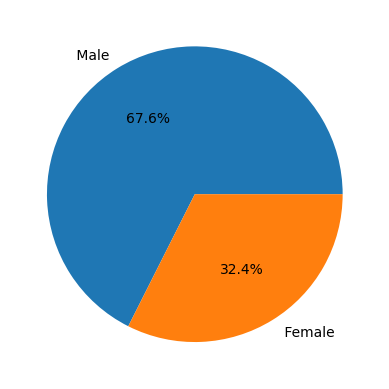

In [26]:
labels = df.sex.unique()
plt.pie(df.sex.value_counts(), autopct='%1.1f%%', labels = labels)
df.sex.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

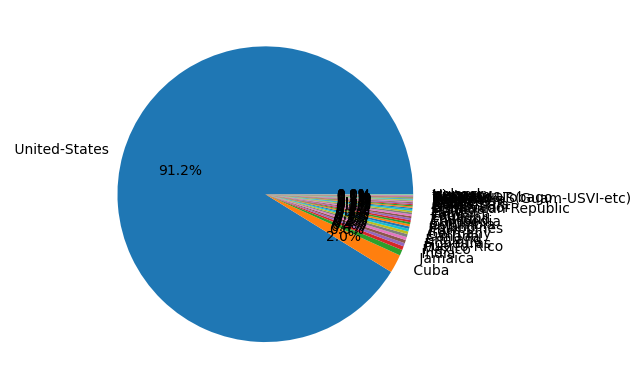

In [27]:
labels = df.native.unique()
plt.pie(df.native.value_counts(), autopct='%1.1f%%', labels = labels)
df.native.value_counts()

C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

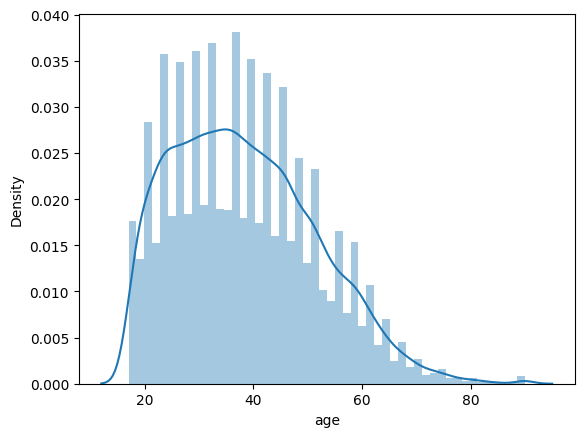

In [28]:
sns.distplot(df['age'])

C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\2374616375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['educationno'])


<AxesSubplot: xlabel='educationno', ylabel='Density'>

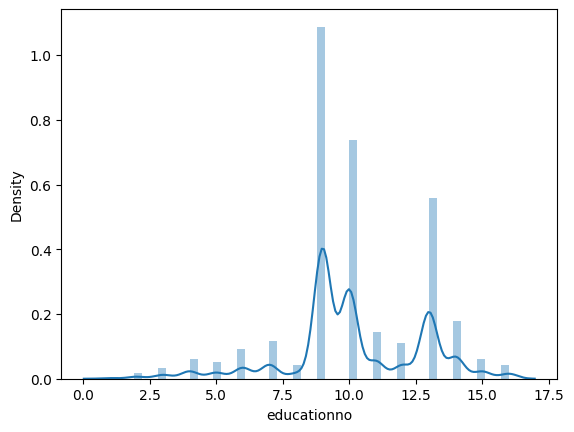

In [29]:
sns.distplot(df['educationno'])

C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\1521259746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capitalgain'])


<AxesSubplot: xlabel='capitalgain', ylabel='Density'>

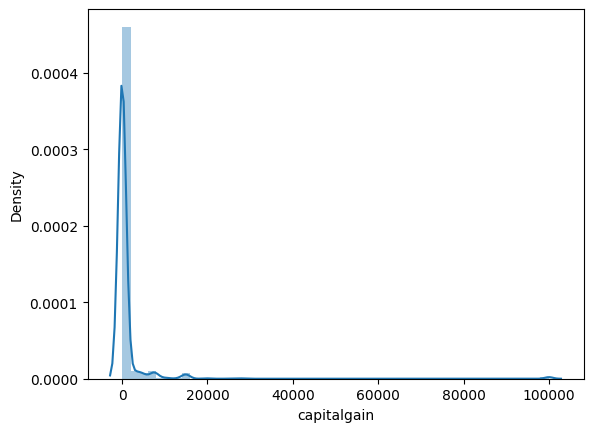

In [30]:
sns.distplot(df['capitalgain'])

C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\1070095398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capitalloss'])


<AxesSubplot: xlabel='capitalloss', ylabel='Density'>

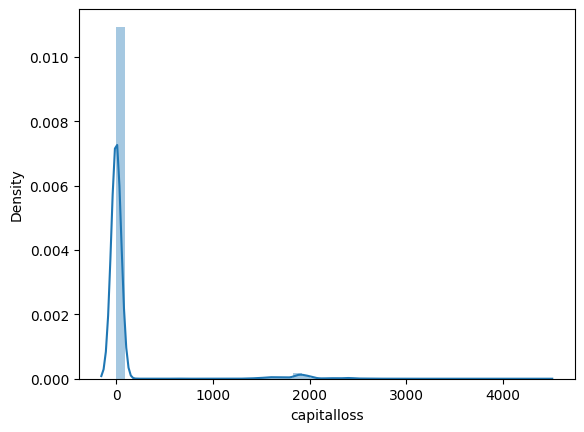

In [31]:
sns.distplot(df['capitalloss'])

C:\Users\abhil\AppData\Local\Temp\ipykernel_11392\1443477202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hoursperweek'])


<AxesSubplot: xlabel='hoursperweek', ylabel='Density'>

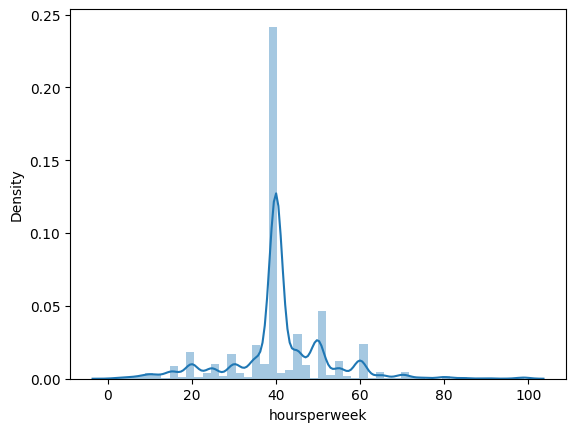

In [32]:
sns.distplot(df['hoursperweek'])

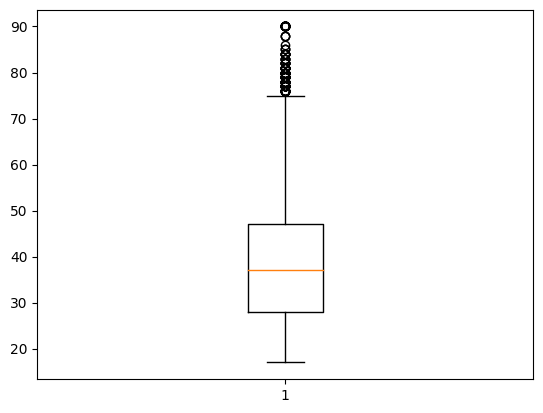

<Figure size 640x480 with 0 Axes>

In [33]:
plt.boxplot(df['age'])
plt.show()
plt.tight_layout()

#### From the plot of Age there are outliers in the upper Quartile of the plot

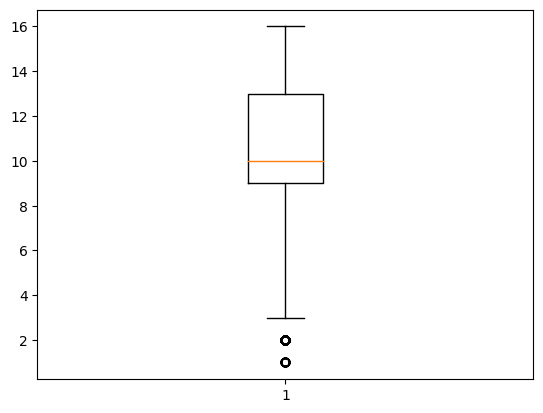

<Figure size 640x480 with 0 Axes>

In [34]:
plt.boxplot(df['educationno'])
plt.show()
plt.tight_layout()

#### From the plot of Age there are outliers in the Lower Quartile of the plot

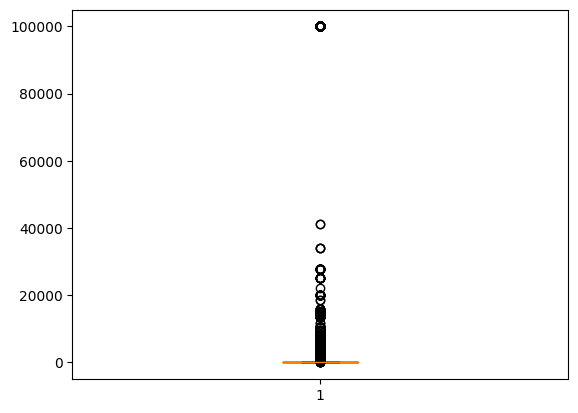

<Figure size 640x480 with 0 Axes>

In [35]:
plt.boxplot(df['capitalgain'])
plt.show()
plt.tight_layout()

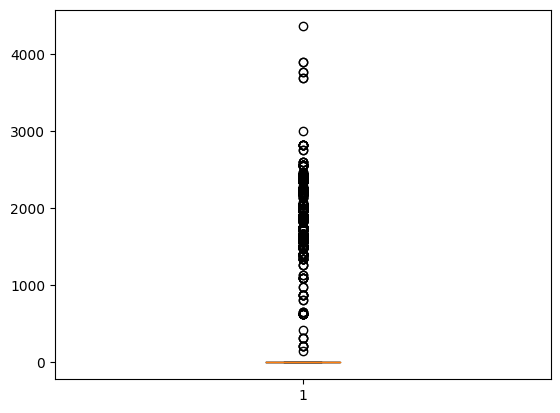

<Figure size 640x480 with 0 Axes>

In [36]:
plt.boxplot(df['capitalloss'])
plt.show()
plt.tight_layout()

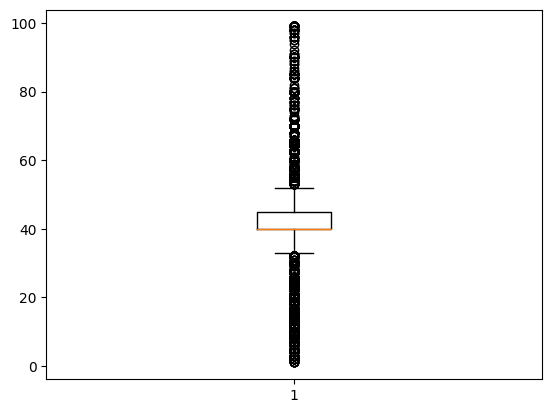

<Figure size 640x480 with 0 Axes>

In [37]:
plt.boxplot(df['hoursperweek'])
plt.show()
plt.tight_layout()

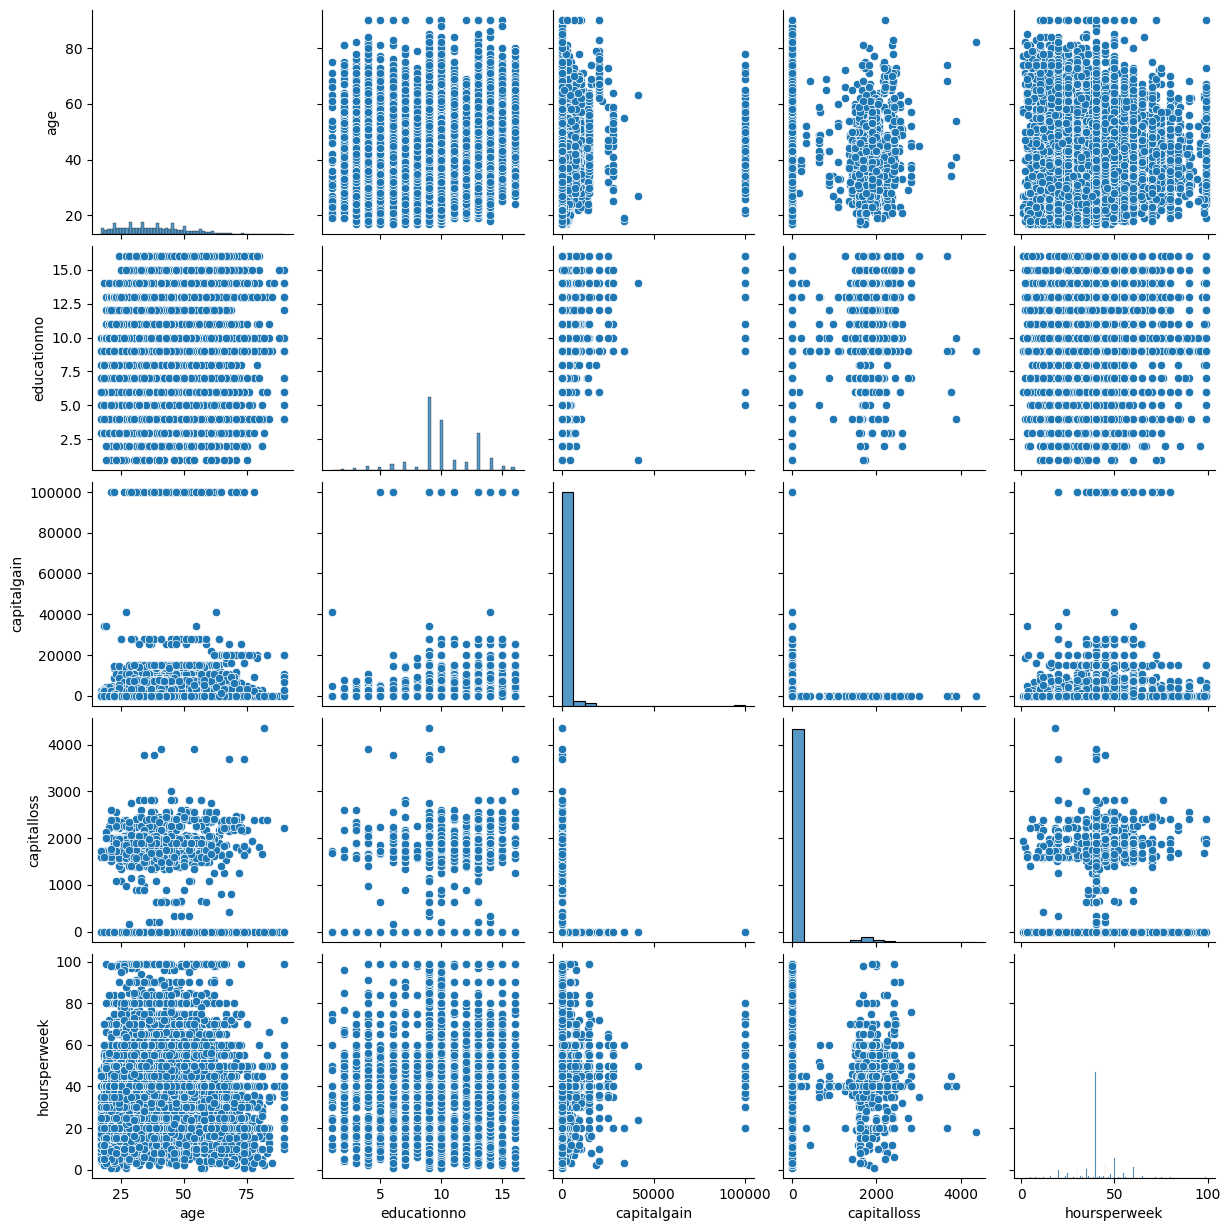

In [38]:
sns.pairplot(df)

#### From the scatter plot in the pairplot found that there is no relationship between Age and other Variables
#### From the scatter plot in the pairplot found that there is no relationship between educationno and other Variables
#### From the scatter plot in the pairplot found that there is no relationship between capitalgain and other Variables
#### From the scatter plot in the pairplot found that there is no relationship between capitalloss and other Variables
#### From the scatter plot in the pairplot found that there is no relationship between hoursperweek and other Variables

In [39]:
# Checking for missing values
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [40]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [41]:
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [42]:
import category_encoders as ce

In [43]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

In [44]:
X = df.drop(['Salary'], axis=1)

y = df['Salary']

In [45]:
X_train, y_train = X,y 

In [46]:
len(X_train)

30161

In [47]:
len(y_train)

30161

In [48]:
X1 = df_test.drop(['Salary'], axis=1)

y1 = df_test['Salary']

In [49]:
X_test, y_test = X1, y1 

In [50]:
len(X_test)

15060

In [51]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\abhil\miniconda3\envs\Tensorflo

In [52]:
cols = X_train.columns

In [53]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,39,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,50,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30157,40,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30158,58,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30159,22,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,25,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15056,39,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15057,38,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15058,44,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.preprocessing import RobustScaler

In [56]:
scaled = RobustScaler()

In [57]:
X_train = scaled.fit_transform(X_train)

In [58]:
X_test = scaled.fit_transform(X_test)

In [59]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [60]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [61]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.45,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
model = GaussianNB()

In [64]:
model.fit(X_train, y_train)

GaussianNB()

In [65]:
X_train.isnull().sum()

age            0
workclass_1    0
workclass_2    0
workclass_3    0
workclass_4    0
              ..
native_36      0
native_37      0
native_38      0
native_39      0
native_40      0
Length: 102, dtype: int64

In [66]:
X_test.isnull().sum()

age            0
workclass_1    0
workclass_2    0
workclass_3    0
workclass_4    0
              ..
native_36      0
native_37      0
native_38      0
native_39      0
native_40      0
Length: 102, dtype: int64

In [67]:
pred = model.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.86     11360
        >50K       0.56      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



In [70]:
model.score(X_test, y_test)*100

80.0199203187251

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Model accuracy score: 0.8002


In [73]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

Training set score: 0.8014


In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

In [76]:
scores

0.8004376350057003

In [77]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test, pred)

array([[9024, 2336],
       [ 673, 3027]], dtype=int64)

In [81]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\abhil\miniconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


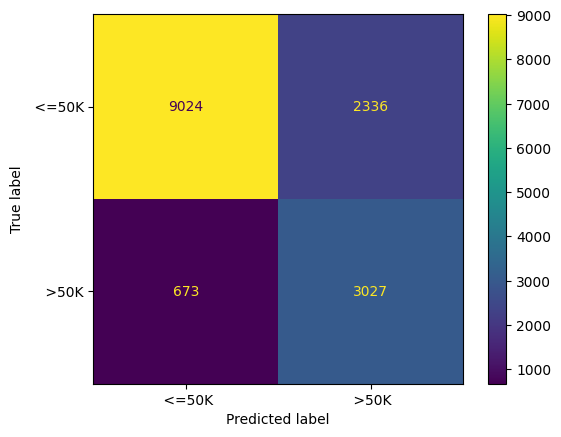

In [83]:
plot_confusion_matrix(model, X_test, y_test)  